In [118]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score,classification_report,precision_score,recall_score
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import AdaBoostClassifier

In [119]:
data=pd.read_csv('healthcare-dataset-stroke-data.csv')
data.info()
## Showing information about datase
data.describe()
## Showing data's statistical featuresn

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# New Section

In [120]:
data.head(5)
## Displaying top 10 rows

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [121]:
data.drop("id",inplace=True,axis=1)

Unique values
 ['Male' 'Female' 'Other']
Value Counts
 Female    2994
Male      2115
Other        1
Name: gender, dtype: int64


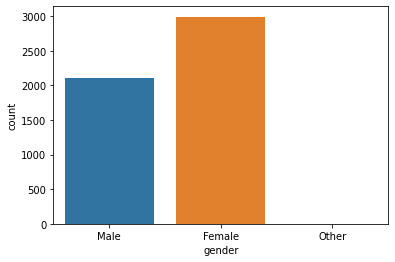

In [122]:
print('Unique values\n',data['gender'].unique())
print('Value Counts\n',data['gender'].value_counts())
# Above codes will help to give us information about it's unique values and count of each value.

sns.countplot(data=data,x='gender')
# Helps to plot a count plot which will help us to see count of values in each unique category.

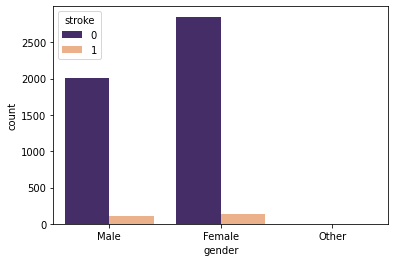

In [123]:
sns.countplot(data=data,x='gender',hue='stroke',palette=['#432371',"#FAAE7B"])
# This plot will help to analyze how gender will affect chances of stroke.

In [124]:
data['age'].nunique()

104

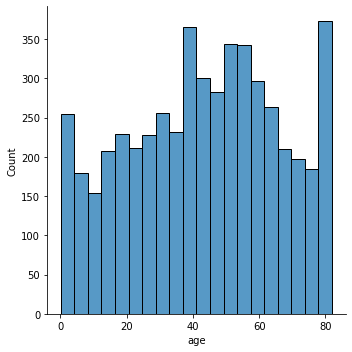

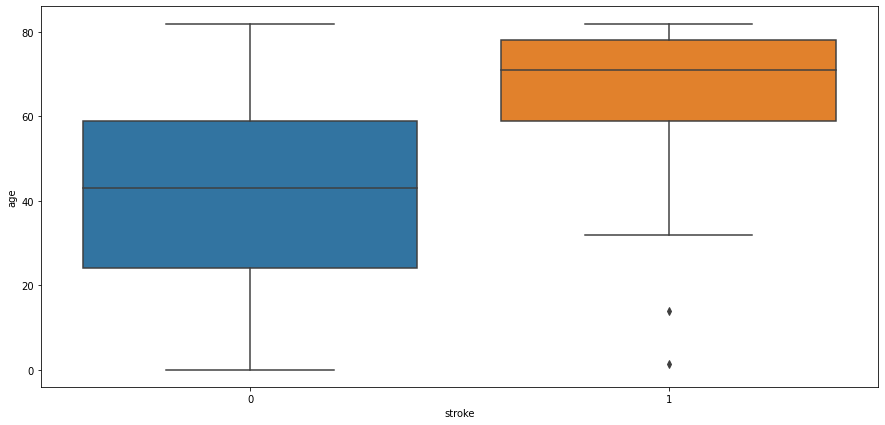

In [125]:

# Returns number of unique values in this attribute
sns.displot(data['age'])
# This will plot a distribution plot of variable age
plt.figure(figsize=(15,7))
sns.boxplot(data=data,x='stroke',y='age')
# Above code will plot a boxplot of variable age with respect of target attribute stroke

In [126]:
print('Unique values\n',data['hypertension'].unique())
print('Value Counts\n',data['hypertension'].value_counts())

Unique values
 [0 1]
Value Counts
 0    4612
1     498
Name: hypertension, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


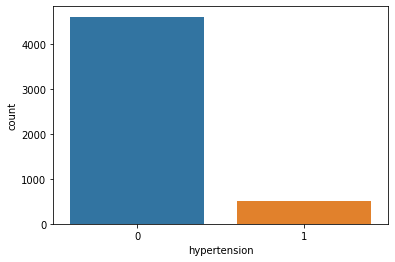

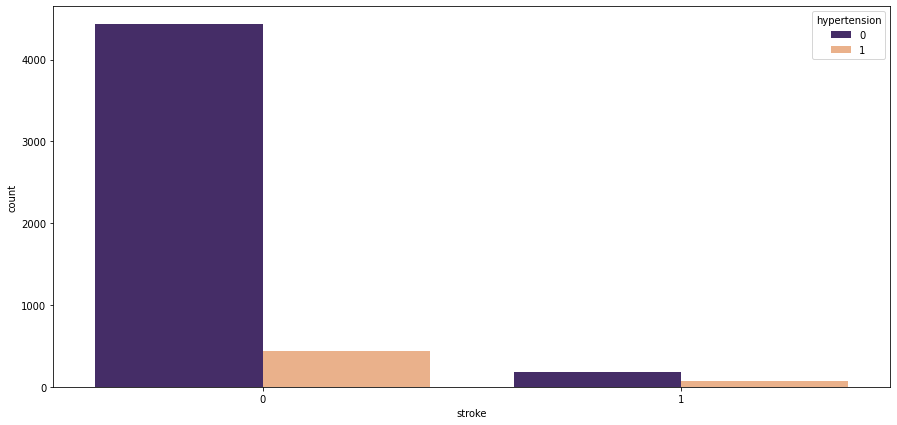

In [127]:

# Returns number of unique values in this attribute
sns.countplot(data['hypertension'])
# This will plot a distribution plot of variable age
plt.figure(figsize=(15,7))
sns.countplot(data=data,x='stroke',hue='hypertension',palette=['#432371',"#FAAE7B"])


Unique Value
 [1 0]
Value Counts
 0    4834
1     276
Name: heart_disease, dtype: int64


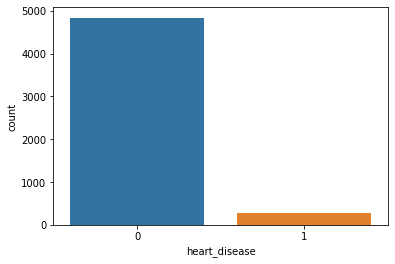

In [128]:
print('Unique Value\n',data['heart_disease'].unique())
print('Value Counts\n',data['heart_disease'].value_counts())
# Above code will return unique value for heart disease attribute and its value counts
sns.countplot(data=data,x='heart_disease')
# Will plot a counter plot of variable heart diseases

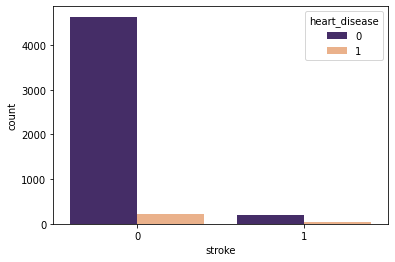

In [129]:
sns.countplot(data=data,x='stroke',hue='heart_disease',palette=['#432371',"#FAAE7B"])


Unique Values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1757
Name: ever_married, dtype: int64


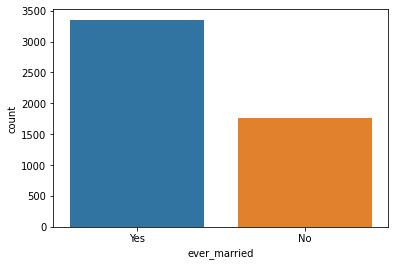

In [130]:
print('Unique Values\n',data['ever_married'].unique())
print('Value Counts\n',data['ever_married'].value_counts())
# Above code will show us number unique values of attribute and its count
sns.countplot(data=data,x='ever_married')
# Counter plot of ever married attribute


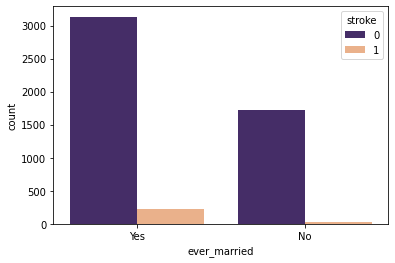

In [131]:
sns.countplot(data=data,x='ever_married',hue='stroke',palette=['#432371',"#FAAE7B"])
# Ever married with respect of stroke

Unique Value
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


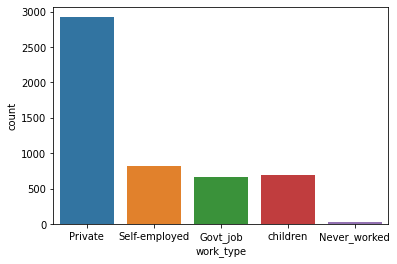

In [132]:
print('Unique Value\n',data['work_type'].unique())
print('Value Counts\n',data['work_type'].value_counts())
# Above code will return unique values of attributes and its count
sns.countplot(data=data,x='work_type')
# Above code will create a count plot


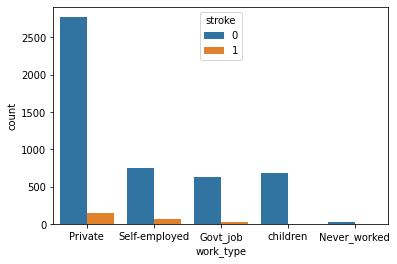

In [133]:
sns.countplot(data=data,x='work_type',hue='stroke')
# Above code will create a count plot with respect to stroke

Unique Values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2514
Name: Residence_type, dtype: int64


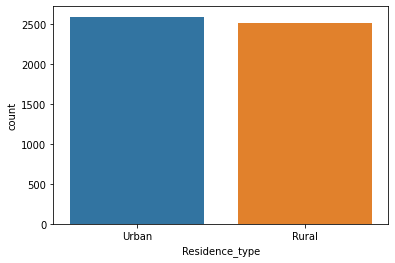

In [134]:
print('Unique Values\n',data['Residence_type'].unique())
print("Value Counts\n",data['Residence_type'].value_counts())
# Above code will return unique values of variable and its count
sns.countplot(data=data,x='Residence_type')
# This will create a counter plot


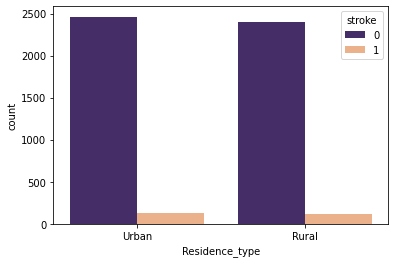

In [135]:
sns.countplot(data=data,x='Residence_type',hue='stroke',palette=['#432371',"#FAAE7B"])
# Residence Type with respect to stroke

In [136]:
data['avg_glucose_level'].nunique()
# Number of unique values

3979

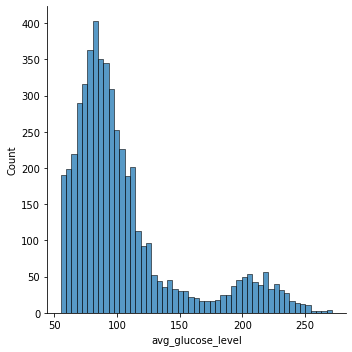

In [137]:
sns.displot(data['avg_glucose_level'])
# Distribution of avg_glucose_level


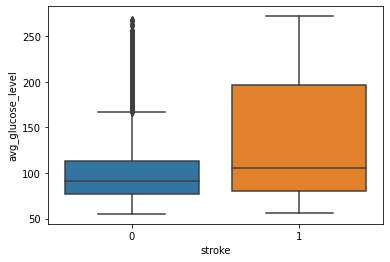

In [138]:
sns.boxplot(data=data,x='stroke',y='avg_glucose_level')
# Avg_glucose_level and Stroke

In [139]:
data['bmi'].isna().sum()
# Returns number null values

201

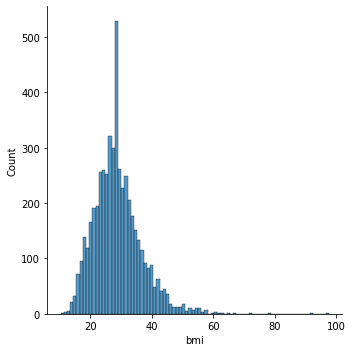

In [140]:

data['bmi'].fillna(data['bmi'].mean(),inplace=True)
# Filling null values with average value
data['bmi'].nunique()
# Returns number of unique values in that attribute
sns.displot(data['bmi'])
# Distribution of bmi


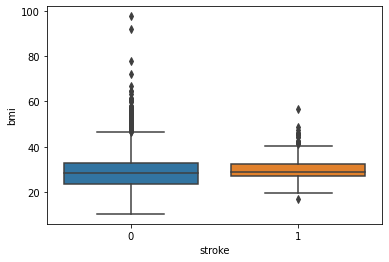

In [141]:
sns.boxplot(data=data,x='stroke',y='bmi')
# BMI with respect to Stroke

Unique Values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64


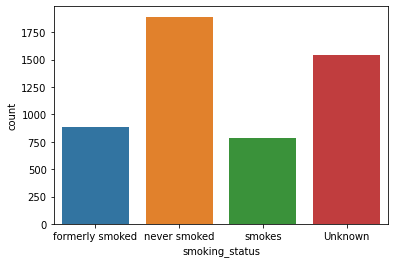

In [142]:
print('Unique Values\n',data['smoking_status'].unique())
print('Value Counts\n',data['smoking_status'].value_counts())
# Returns unique values and its count
sns.countplot(data=data,x='smoking_status')
# Count plot of smoking status


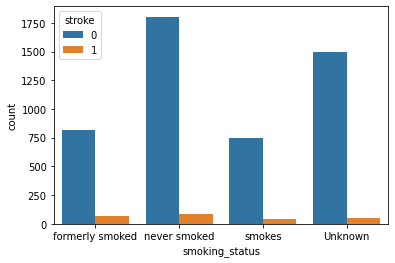

In [143]:
sns.countplot(data=data,x='smoking_status',hue='stroke')
# Smoking Status with respect to Stroke

Unique Value
 [1 0]
Value Counts
 0    4861
1     249
Name: stroke, dtype: int64


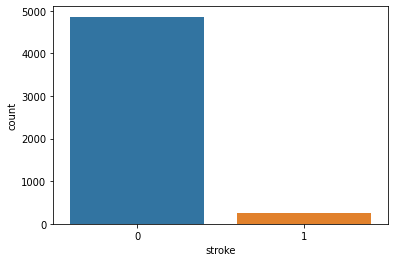

In [144]:
print('Unique Value\n',data['stroke'].unique())
print('Value Counts\n',data['stroke'].value_counts())
# Returns Unique Value and its count
sns.countplot(data=data,x='stroke')
# Count Plot of Stroke

In [145]:
cols=data.select_dtypes(include=['object']).columns
print(cols)
# This code will fetech columns whose data type is object.

Index(['gender', 'ever_married', 'work_type', 'Residence_type',
       'smoking_status'],
      dtype='object')


In [146]:

le=LabelEncoder()
# Initializing our Label Encoder object
data[cols]=data[cols].apply(le.fit_transform)
# Transfering categorical data into numeric
print(data.head(10))

   gender   age  hypertension  ...        bmi  smoking_status  stroke
0       1  67.0             0  ...  36.600000               1       1
1       0  61.0             0  ...  28.893237               2       1
2       1  80.0             0  ...  32.500000               2       1
3       0  49.0             0  ...  34.400000               3       1
4       0  79.0             1  ...  24.000000               2       1
5       1  81.0             0  ...  29.000000               1       1
6       1  74.0             1  ...  27.400000               2       1
7       0  69.0             0  ...  22.800000               2       1
8       0  59.0             0  ...  28.893237               0       1
9       0  78.0             0  ...  24.200000               0       1

[10 rows x 11 columns]


In [147]:
print(data['Residence_type'].head(30))

0     1
1     0
2     0
3     1
4     0
5     1
6     0
7     1
8     0
9     1
10    0
11    0
12    1
13    1
14    1
15    0
16    1
17    1
18    1
19    1
20    0
21    1
22    1
23    0
24    1
25    0
26    0
27    0
28    1
29    0
Name: Residence_type, dtype: int64


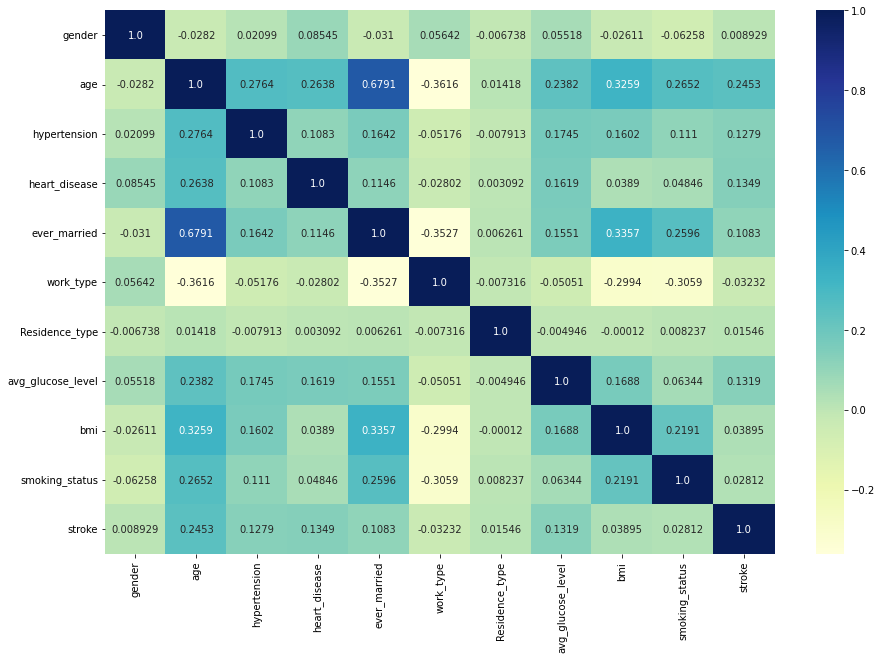

In [148]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(),annot=True,fmt='.4',cmap="YlGnBu")

In [149]:
classifier = SelectKBest(score_func=f_classif,k=5)
fits = classifier.fit(data.drop('stroke',axis=1),data['stroke'])
print(fits)
x=pd.DataFrame(fits.scores_)
print(x)
columns = pd.DataFrame(data.drop('stroke',axis=1).columns)
fscores = pd.concat([columns,x],axis=1)
fscores.columns = ['Attribute','Score']
fscores.sort_values(by='Score',ascending=False)

SelectKBest(k=5)
            0
0    0.407266
1  326.916568
2   84.953542
3   94.698406
4   60.667230
5    5.340019
6    1.220842
7   90.503870
8    7.759776
9    4.043033


,Attribute,Score
1,age,326.916568
3,heart_disease,94.698406
7,avg_glucose_level,90.503870
2,hypertension,84.953542
4,ever_married,60.667230
8,bmi,7.759776
5,work_type,5.340019
9,smoking_status,4.043033
6,Residence_type,1.220842
0,gender,0.407266


In [150]:
cols=fscores[fscores['Score']>50]['Attribute']
print(cols)

1                  age
2         hypertension
3        heart_disease
4         ever_married
7    avg_glucose_level
Name: Attribute, dtype: object


In [151]:
train_x,test_x,train_y,test_y=train_test_split(data[cols],data['stroke'],random_state=1255,test_size=0.25)
#Splitting data
train_x.shape,test_x.shape,train_y.shape,test_y.shape
# Shape of data

((3832, 5), (1278, 5), (3832,), (1278,))

In [152]:
smote=SMOTE()
train_x,train_y=smote.fit_resample(train_x,train_y)
test_x,test_y=smote.fit_resample(test_x,test_y)

In [153]:
print(train_x.shape,train_y.shape,test_x.shape,test_y.shape)

(7296, 5) (7296,) (2426, 5) (2426,)


In [154]:
test_x

,age,hypertension,heart_disease,ever_married,avg_glucose_level
0,71.000000,1,0,1,93.600000
1,50.000000,0,0,1,88.240000
2,23.000000,0,0,0,75.250000
3,62.000000,0,0,1,128.610000
4,70.000000,0,0,1,66.850000
...,...,...,...,...,...
2421,73.538835,0,0,1,69.436650
2422,75.813127,0,0,1,100.233186
2423,73.674686,0,0,1,235.048573
2424,63.442206,0,0,1,201.114805


In [155]:
from sklearn.linear_model import LogisticRegression

In [156]:
model = LogisticRegression()

In [157]:
model.fit(train_x,train_y)

LogisticRegression()

In [158]:
z=model.predict(test_x)

In [159]:
model.predict_proba(test_x)

array([[0.44931333, 0.55068667],
       [0.69019717, 0.30980283],
       [0.93310963, 0.06689037],
       ...,
       [0.10226159, 0.89773841],
       [0.25547317, 0.74452683],
       [0.37417369, 0.62582631]])

In [160]:
train_x_prediction = model.predict(train_x)
training_data_accuracy = accuracy_score(train_x_prediction,train_y)

In [161]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7802905701754386


In [162]:
test_x_prediction = model.predict(test_x)
test_data_accuracy = accuracy_score(test_x_prediction,test_y)

In [163]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.8017312448474856


In [164]:
model.predict(test_x[0:100])

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [165]:
xgc=XGBClassifier(objective='binary:logistic',n_estimators=100000,max_depth=5,learning_rate=0.001,n_jobs=-1)

In [110]:
xgc.fit(train_x,train_y)

XGBClassifier(learning_rate=0.001, max_depth=5, n_estimators=100000, n_jobs=-1)

In [111]:
predict=xgc.predict(test_x)

In [112]:
xgc.score(test_x,test_y)

0.921681780708986

In [113]:
xgc.predict_proba(test_x)

array([[0.9938367 , 0.00616332],
       [0.93632025, 0.06367978],
       [0.9977536 , 0.00224635],
       ...,
       [0.06460381, 0.9353962 ],
       [0.0294773 , 0.9705227 ],
       [0.0830518 , 0.9169482 ]], dtype=float32)

In [53]:
train_x_prediction = xgc.predict(train_x)
training_data_accuracy = accuracy_score(train_x_prediction,train_y)

In [114]:
print('Accuracy on Training data : ', training_data_accuracy)

Accuracy on Training data :  0.7809758771929824


In [115]:
test_x_prediction = xgc.predict(test_x)
test_data_accuracy = accuracy_score(test_x_prediction,test_y)

In [116]:
print('Accuracy on Test data : ', test_data_accuracy)

Accuracy on Test data :  0.921681780708986


In [117]:
xgc.predict(test_x[0:100])

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])